In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataframe = pd.read_csv('../data/raw/ml-100k/u.data', sep='\t', names=['user', 'movie', 'rating', 'timestamp'])
dataframe.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
dataframe.describe()

,user,movie,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [7]:
print(f'Amount of unique users: {len(dataframe["user"].unique())}')

Amount of unique users: 943


In [8]:
print(f'Amount of unique movies: {len(dataframe["movie"].unique())}')

Amount of unique movies: 1682


In [9]:
print(f'Lowest rating: {dataframe["rating"].min()}, highest rating: {dataframe["rating"].max()}')

Lowest rating: 1, highest rating: 5


In [10]:
print(f'Average rating: {dataframe["rating"].mean()}')

Average rating: 3.52986


In [12]:
genre_dataframe = pd.read_csv('../data/raw/ml-100k/u.genre', sep='|', names=['genre', 'id'])
genre_dataframe.head()

,genre,id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [17]:
movie_dataframe = pd.read_csv(
    '../data/raw/ml-100k/u.item',
    sep='|',
    names=['id', 'name', 'release_date', 'video_release', 'url', *genre_dataframe['genre']],
    encoding='latin-1', 
    index_col=0)
movie_dataframe.head()

,name,release_date,video_release,url,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
movie_dataframe.drop(['video_release', 'url'], axis=1, inplace=True)

In [21]:
merged = pd.merge(dataframe, movie_dataframe, left_on='movie', right_on='id').drop(['movie'], axis=1)
merged.head()

,user,rating,timestamp,name,release_date,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,3,881250949,Kolya (1996),24-Jan-1997,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,3,875747190,Kolya (1996),24-Jan-1997,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,5,883888671,Kolya (1996),24-Jan-1997,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,3,879138235,Kolya (1996),24-Jan-1997,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,5,876503793,Kolya (1996),24-Jan-1997,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
genres = genre_dataframe['genre']
rating_counts = [merged[genre].sum() for genre in genres]

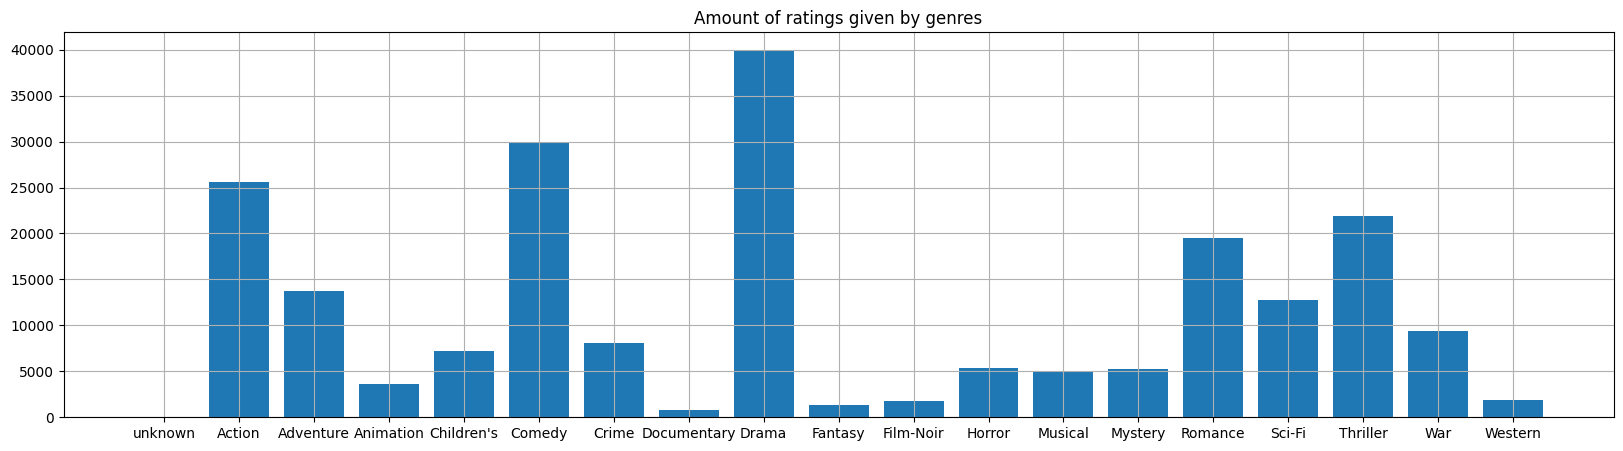

In [35]:
figure, axes = plt.subplots(figsize=(20, 5))

axes.bar(genres, rating_counts)
axes.grid(True)
axes.set_title('Amount of ratings given by genres')
plt.show()

In [37]:
average_ratings = [merged[merged[genre] == 1]['rating'].mean() for genre in genres]

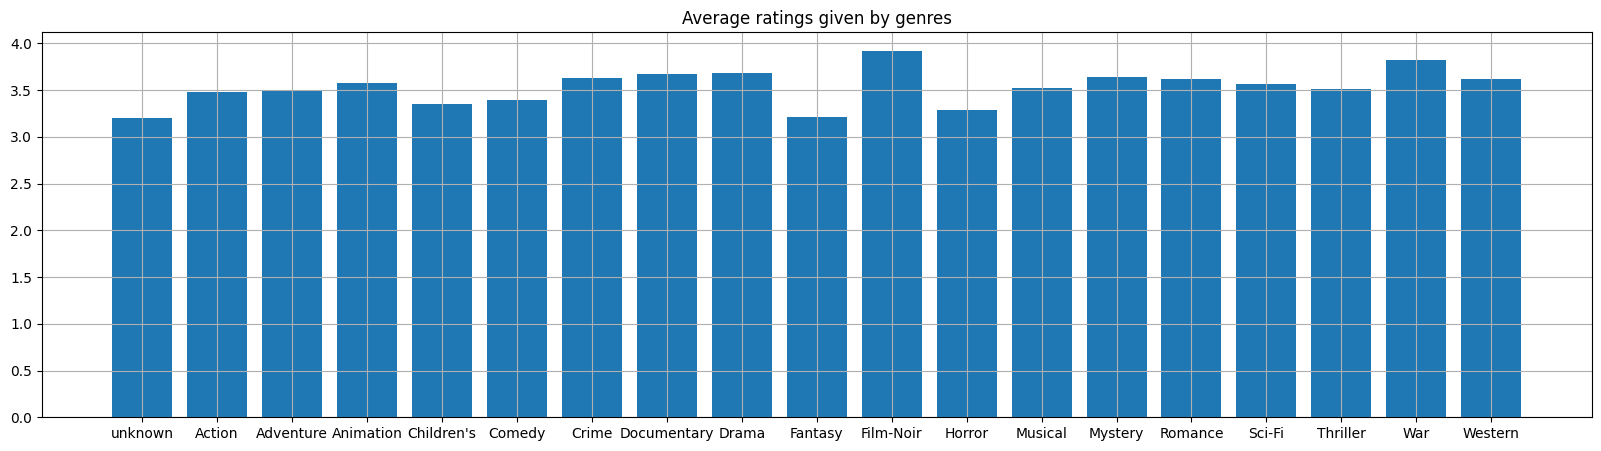

In [39]:
figure, axes = plt.subplots(figsize=(20, 5))

axes.bar(genres, average_ratings)
axes.grid(True)
axes.set_title('Average ratings given by genres')
plt.show()